## Detection of COVID-19 Cases from Chest X-Ray Images

##### Based on COVID-NET: https://github.com/lindawangg/COVID-Net
###### And 
##### COVID-NET IN KERAS: https://github.com/busyyang/COVID-19


* In order to download the dataset of images and create test and train folder, run:  create_dataset.ipynb
* Training process is faster runnig from a python file than a jupyter notebook, so from terminal run: python train.py
    * Training process last 50 h approximately in a NVIDIA 8117MiB
* Files for traininig and test accuracy and loss history are saved as csv as well as true and predicted y
* Model is saved as model.h5
* Then this jupyter notebook is used to visualize results 

In [21]:
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from os import path
from tensorflow.keras.models import load_model
import cv2


#### Load results and history files as CSV 

In [2]:
loss_his  = pd.read_csv('loss_his.csv', header=None)
pred_test = pd.read_csv('pred_test.csv', header=None)
hist_accuracy = pd.read_csv('hist_accuracy.csv', header=None)
true_test = pd.read_csv('true_test.csv', header=None)
loss_test  = pd.read_csv('loss_test.csv', header=None)
hist_accuracy_test = pd.read_csv('hist_accuracy_test.csv', header=None)


#### Plot confusion matrix

array([824,  58,   3,  33, 560,   1,   1,   9,  21])

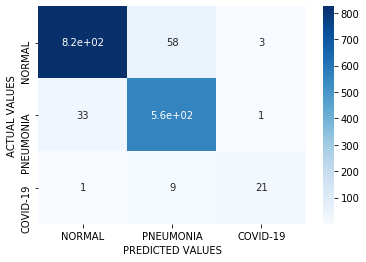

In [15]:
from sklearn.metrics import confusion_matrix 

matrix = confusion_matrix(true_test[0], pred_test[0])

df = pd.DataFrame(matrix, columns=["NORMAL","PNEUMONIA","COVID-19"])
 
df.index = ["NORMAL","PNEUMONIA","COVID-19"]
plt.figure()
p1 = sn.heatmap(df,cmap="Blues", annot=True)
plt.ylabel("ACTUAL VALUES")
plt.xlabel("PREDICTED VALUES")

confusion_matrix(true_test[0], pred_test[0]).ravel()

### Plot training and test loss

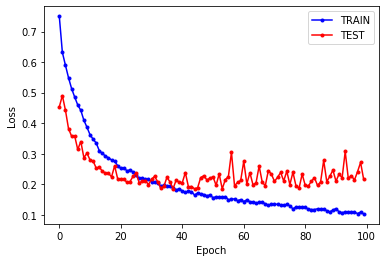

In [16]:
plt.plot(range(len(loss_his)),loss_his, linestyle='-', marker='.', color='b')
plt.plot(range(len(loss_test)),loss_test, linestyle='-', marker='.', color= 'r')
plt.legend(("TRAIN","TEST"))
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

### Plot test and traing Accuracy history

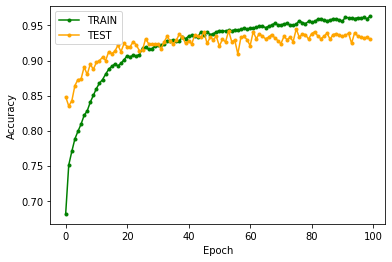

In [17]:
plt.plot(range(len(hist_accuracy)),hist_accuracy, linestyle='-', marker='.', color='g')
plt.plot(range(len(hist_accuracy_test)),hist_accuracy_test, linestyle='-', marker='.', color='orange')
plt.legend(("TRAIN","TEST"))
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()


In [20]:
class_acc = [matrix[i,i]/np.sum(matrix[i,:]) if np.sum(matrix[i,:]) else 0 for i in range(len(matrix))]
print('Sens Normal: {0:.3f}, Pneumonia: {1:.3f}, COVID-19: {2:.3f}'.format(class_acc[0],
                                                                             class_acc[1],
                                                                             class_acc[2]))
ppvs = [matrix[i,i]/np.sum(matrix[:,i]) if np.sum(matrix[:,i]) else 0 for i in range(len(matrix))]

print('PPV Normal: {0:.3f}, Pneumonia {1:.3f}, COVID-19: {2:.3f}'.format(ppvs[0],

                                                                            ppvs[1],
                                                                             ppvs[2]))
npvs = [(np.sum(matrix)-np.sum(matrix[i,:])- np.sum(matrix[:,i])+ matrix[i,i])/(np.sum(matrix)-np.sum(matrix[i,:])) if np.sum(matrix[i,:]) else 0 for i in range(len(matrix))]

print('NPV Normal: {0:.3f}, Pneumonia {1:.3f}, COVID-19: {2:.3f}'.format(npvs[0],

                                                                            npvs[1],
                                                                             npvs[2]))

Sens Normal: 0.931, Pneumonia: 0.943, COVID-19: 0.677
PPV Normal: 0.960, Pneumonia 0.893, COVID-19: 0.840
NPV Normal: 0.946, Pneumonia 0.927, COVID-19: 0.997


## Prediction With real images and saliency maps

In [27]:
saved_model=load_model('model.h5')

ResourceExhaustedError: OOM when allocating tensor of shape [] and type float
	 [[node PEPX1.2Extension_3/kernel/Initializer/random_uniform/min (defined at /home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:1748) ]]

Original stack trace for 'PEPX1.2Extension_3/kernel/Initializer/random_uniform/min':
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 583, in start
    self.io_loop.start()
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/asyncio/base_events.py", line 541, in run_forever
    self._run_once()
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/asyncio/base_events.py", line 1786, in _run_once
    handle._run()
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2858, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2886, in _run_cell
    return runner(coro)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3063, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3254, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-27-67799ecd2969>", line 1, in <module>
    saved_model=load_model('model.h5')
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/keras/saving/save.py", line 143, in load_model
    return hdf5_format.load_model_from_hdf5(filepath, custom_objects, compile)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/keras/saving/hdf5_format.py", line 162, in load_model_from_hdf5
    custom_objects=custom_objects)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/keras/saving/model_config.py", line 55, in model_from_config
    return deserialize(config, custom_objects=custom_objects)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/keras/layers/serialization.py", line 105, in deserialize
    printable_module_name='layer')
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/keras/utils/generic_utils.py", line 191, in deserialize_keras_object
    list(custom_objects.items())))
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/network.py", line 1081, in from_config
    process_node(layer, node_data)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/network.py", line 1039, in process_node
    layer(input_tensors, **kwargs)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/base_layer.py", line 824, in __call__
    self._maybe_build(inputs)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/base_layer.py", line 2146, in _maybe_build
    self.build(input_shapes)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/keras/layers/convolutional.py", line 165, in build
    dtype=self.dtype)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/base_layer.py", line 529, in add_weight
    aggregation=aggregation)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/training/tracking/base.py", line 712, in _add_variable_with_custom_getter
    **kwargs_for_getter)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/base_layer_utils.py", line 139, in make_variable
    shape=variable_shape if variable_shape else None)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/ops/variables.py", line 258, in __call__
    return cls._variable_v1_call(*args, **kwargs)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/ops/variables.py", line 219, in _variable_v1_call
    shape=shape)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/ops/variables.py", line 197, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/ops/variable_scope.py", line 2503, in default_variable_creator
    shape=shape)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/ops/variables.py", line 262, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py", line 1406, in __init__
    distribute_strategy=distribute_strategy)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py", line 1537, in _init_from_args
    initial_value() if init_from_fn else initial_value,
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/base_layer_utils.py", line 119, in <lambda>
    init_val = lambda: initializer(shape, dtype=dtype)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/ops/init_ops.py", line 533, in __call__
    shape, -limit, limit, dtype, seed=self.seed)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/ops/random_ops.py", line 238, in random_uniform
    minval = ops.convert_to_tensor(minval, dtype=dtype, name="min")
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py", line 1184, in convert_to_tensor
    return convert_to_tensor_v2(value, dtype, preferred_dtype, name)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py", line 1242, in convert_to_tensor_v2
    as_ref=False)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py", line 1297, in internal_convert_to_tensor
    ret = conversion_func(value, dtype=dtype, name=name, as_ref=as_ref)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/framework/tensor_conversion_registry.py", line 52, in _default_conversion_function
    return constant_op.constant(value, dtype, name=name)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/framework/constant_op.py", line 227, in constant
    allow_broadcast=True)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/framework/constant_op.py", line 271, in _constant_impl
    name=name).outputs[0]
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py", line 3357, in create_op
    attrs, op_def, compute_device)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py", line 3426, in _create_op_internal
    op_def=op_def)
  File "/home/jarvis/miniconda3/envs/covidnet/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()


In [ ]:
images_folder = 'newimages'

In [ ]:
!cd 'newimages'
!ls 'newimages'

In [ ]:
from matplotlib import image
image_path = 'newimages/10280060081.jpg'
x = cv2.imread(image_path)
h, w, c = x.shape
x = x[int(h/6):, :]
x = cv2.resize(x, (224, 224))
x = x.astype('float32') / 255.0
saved_mode(x)